In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [83]:
excel_jogos = pd.read_csv("steam-store-games/steam.csv")
excel_requisitos = pd.read_csv("steam-store-games/steam_requirements_data.csv")

In [84]:
excel_jogos

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


# Generos existentes no dataset

In [85]:
generos = excel_jogos.genres.str.cat(sep=";")
generos = generos.split(";")
lista_generos = []
for i in generos:
    if i not in lista_generos:
        lista_generos.append(i)
lista_software = ["Animation & Modeling", "Web Publishing", "Design & Illustration", "Early Access", "Utilities", "Video Production", "Nudity", "Photo Editing", "Accounting", "Game Development", "Free to Play", "Audio Production", "Tutorial", "Sexual Content", "Education", "Software Training", "Documentary"]
for i in lista_software:
    if i in lista_generos:
        lista_generos.remove(i)
lista_generos

['Action',
 'Strategy',
 'Adventure',
 'Indie',
 'RPG',
 'Casual',
 'Simulation',
 'Racing',
 'Violent',
 'Massively Multiplayer',
 'Sports',
 'Gore']

Foi pesquisado sobre os generos existentes para remover os que não eram relacionadas a jogos, como por exemplo "Web Publishing", a fim de focar apenas nos jogos

# DF só com jogos

In [86]:
for i in lista_software:
    excel_only_jogos = excel_jogos[~excel_jogos.genres.str.contains(i)]

utilizou a lista criada com os generos realmente de jogos para a criação desse DF

# Porcentagem dos feedbacks positivos e negativos

In [87]:
excel_only_jogos["ratings"] = excel_only_jogos["positive_ratings"] + excel_only_jogos["negative_ratings"]
excel_only_jogos["Percent_positive"] = excel_only_jogos["positive_ratings"]/excel_only_jogos["ratings"]
excel_only_jogos["Percent_negative"] = excel_only_jogos["negative_ratings"]/excel_only_jogos["ratings"]

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

Foi feito a porcentagem dos feedbacks para evitar que jogos lançados a muito tempo tenham maior número de feedback, tanto positivo quanto negativo, dessa forma, a porcentagem considera apenas a relação entre os positivos, negativos e o total 

# Data de lançamento em anos

In [88]:
l1 = []
l2 = []
l3 = []

for string in excel_only_jogos["release_date"]:
    l1.append(string.split("-"))

for lista in l1:
    l2.append(int(lista[0]))

for e in l2:
    l3.append(2019 - e)
excel_only_jogos["Idade"] = l3

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


No dataset, a idade de lançamento se dava por uma string contendo o ano, mês e dia, como por exemplo "2001-02-04", dessa forma, transformamos essa string em um número que seria à quanto tempo o jogo foi lançado

# Número de categorias

In [89]:
n_cat = []
for i in excel_only_jogos.categories:
    n_cat.append(i.count(";")+1)
excel_only_jogos["n_cat"] = pd.Series(n_cat)

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Foi calculado o número de categorias para analisar jogos que podem ser considerados mais "Completos" por conter mais categorias e jogos mais "Simples" por ter poucas categorias

# Excluindo jogos que não foram jogados (horas médias = 0)

In [90]:
excel_only_jogos = excel_only_jogos.loc[excel_only_jogos.average_playtime != 0]

# Tabela de correlações

In [91]:
excel_only_jogos.corr()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,ratings,Percent_positive,Percent_negative,Idade,n_cat
appid,1.000000,-0.125885,-0.104189,0.095033,-0.078915,-0.038760,-0.015783,0.000530,-0.063853,-0.074233,-0.120422,0.120422,-0.857746,-0.047602
english,-0.125885,1.000000,0.020260,0.005856,0.006074,0.005969,-0.022500,-0.029326,0.001524,0.006285,-0.008055,0.008055,0.072986,0.050223
required_age,-0.104189,0.020260,1.000000,-0.002019,0.065550,0.063035,0.021488,0.001058,0.207173,0.067557,0.047811,-0.047811,0.074283,0.047163
achievements,0.095033,0.005856,-0.002019,1.000000,0.015860,0.008973,0.037477,0.026147,-0.015372,0.015145,-0.020612,0.020612,-0.067357,0.027813
positive_ratings,-0.078915,0.006074,0.065550,0.015860,1.000000,0.761073,0.146445,0.025656,0.050823,0.992278,0.067362,-0.067362,0.050904,0.090164
negative_ratings,-0.038760,0.005969,0.063035,0.008973,0.761073,1.000000,0.151003,0.038905,0.080740,0.835653,-0.007191,0.007191,0.004751,0.056076
average_playtime,-0.015783,-0.022500,0.021488,0.037477,0.146445,0.151003,1.000000,0.914046,0.068159,0.152877,0.033726,-0.033726,-0.005688,0.021885
median_playtime,0.000530,-0.029326,0.001058,0.026147,0.025656,0.038905,0.914046,1.000000,0.050047,0.029163,0.019249,-0.019249,-0.013921,-0.002618
price,-0.063853,0.001524,0.207173,-0.015372,0.050823,0.080740,0.068159,0.050047,1.000000,0.058473,0.183404,-0.183404,-0.039858,0.235624
ratings,-0.074233,0.006285,0.067557,0.015145,0.992278,0.835653,0.152877,0.029163,0.058473,1.000000,0.055664,-0.055664,0.044012,0.087069


Nessa tabela, buscamos ver as maiores correlações entre as variaveis, buscando priorizar o Percent_Positive (porcentagem do feedback positivo) e o Percent_Negative (porcentagem do feedback negativo), que seriam as variaveis que iriamos prever mais a frente.

Analisando a tabela, não foi possível encontrar uma variável que tivesse um alto número de correlação com as porcentagens.

# Tempo médio por gênero

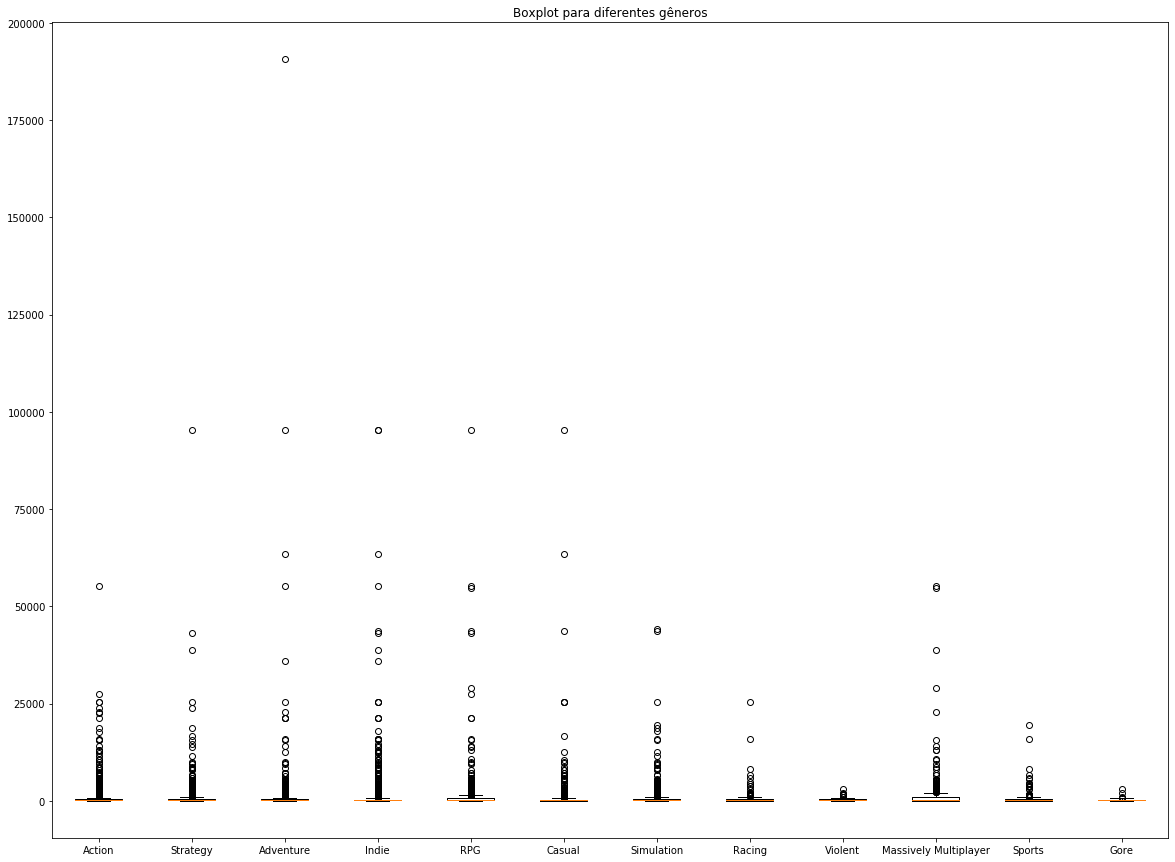

In [92]:
t_medio = excel_only_jogos
data = [t_medio.loc[(t_medio.genres.str.contains(i)) & (t_medio.average_playtime > 0)].average_playtime for i in lista_generos]
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Boxplot para diferentes gêneros')
ax.boxplot(data, labels = lista_generos)
plt.show()

# Log Tempo médio por gênero

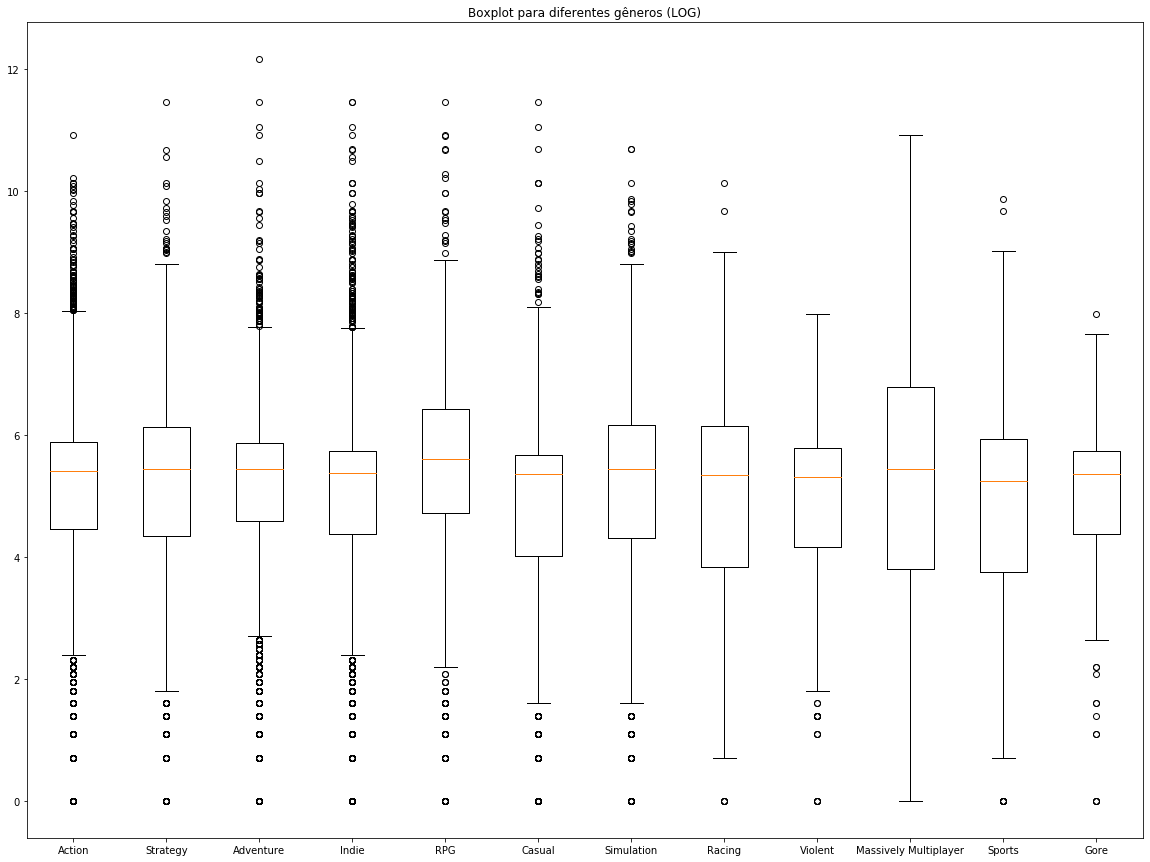

In [93]:
t_medio["log_average_playtime"] = np.log(t_medio["average_playtime"].loc[t_medio["average_playtime"]>0])
data = [t_medio.loc[(t_medio.genres.str.contains(i)) & (t_medio.average_playtime > 0)].log_average_playtime for i in lista_generos]
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Boxplot para diferentes gêneros (LOG)')
ax.boxplot(data, labels = lista_generos)
plt.show()

Percebe-se que, utilizando a função Log, foi encontrado um "melhor" boxplot, porém não houve relação entre os generos e o tempo

# Jogadores por gênero

In [96]:
faixas = []
intervalo = []
jogadores=excel_only_jogos
valores = jogadores.owners.unique()
for i in valores:
    intervalo = i
    intervalo = intervalo.split("-")
    faixas.append(intervalo[0])
    faixas.append(intervalo[-1])
faixas = list(map(int, set(faixas)))
faixas.sort()

In [97]:
compradores = []

for i in jogadores.owners:
#     print(i)
    
    if i == "0-20000":
        compradores.append(np.log10(10000))
    elif i == '200000-500000':
        compradores.append(np.log10(350000))
    elif i == '1000000-2000000':
        compradores.append(np.log10(1500000))
    elif i == '50000-100000':
        compradores.append(np.log10(75000))
    elif i == '100000-200000':
        compradores.append(np.log10(150000))
    elif i == '500000-1000000':
        compradores.append(np.log10(750000))
    elif i == '20000-50000':
        compradores.append(np.log10(35000))
    elif i == '50000000-100000000':
        compradores.append(np.log10(75000000))
    elif i == '100000000-200000000':
        compradores.append(np.log10(150000000))
    elif i == '20000000-50000000':
        compradores.append(np.log10(35000000))
    elif i == '2000000-5000000':
        compradores.append(np.log10(3500000))
    elif i == '10000000-20000000':
        compradores.append(np.log10(15000000))
    else:
        compradores.append(np.log10(7500000))
jogadores["compradores"] = compradores

jogadores = jogadores.dropna()

Foi calculado o número de jogadores por jogo, de acordo com a faixa que eles se encontram, para transformar essa quantitativa discreta em uma contínua

# Histograma dos jogadores

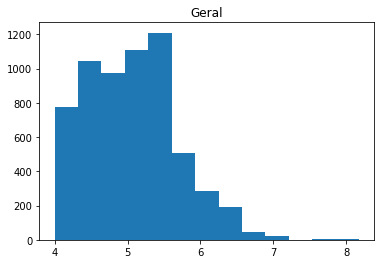

In [99]:
plt.hist(jogadores.compradores, bins=13)
plt.title("Geral")
plt.show()

Percebe-se que o histograma tem uma cauda para a direita, demonstrando que a media é menor que a mediana

# Histograma dos generos

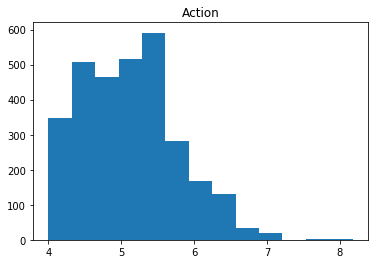

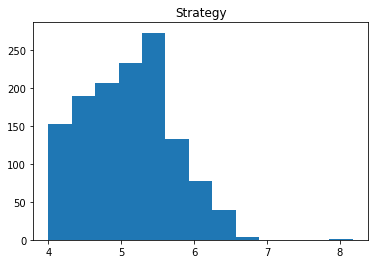

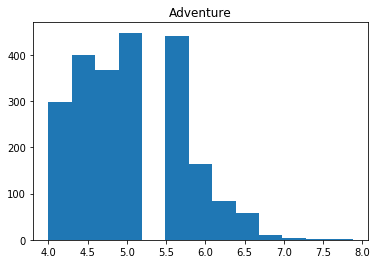

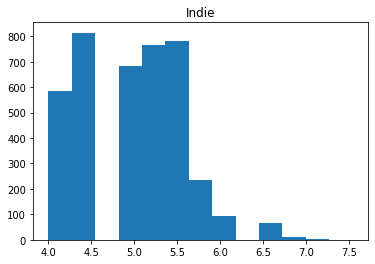

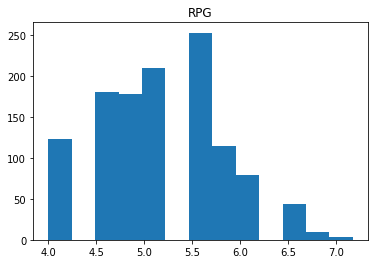

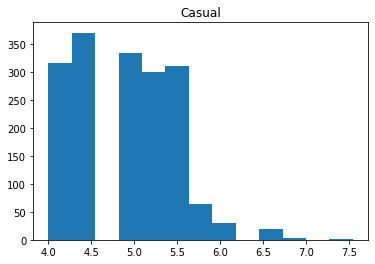

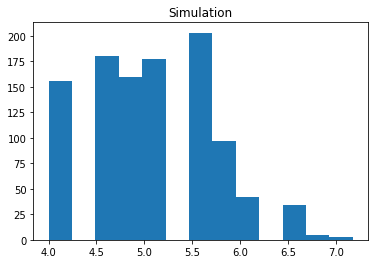

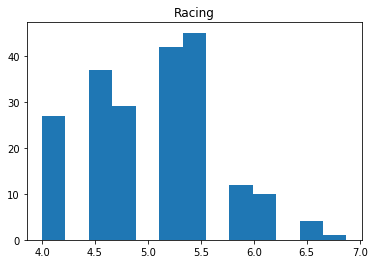

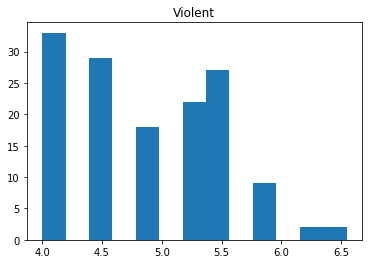

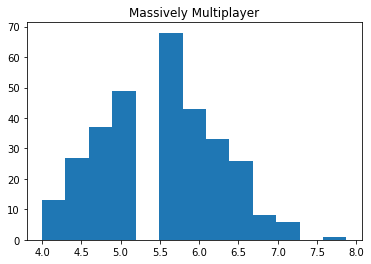

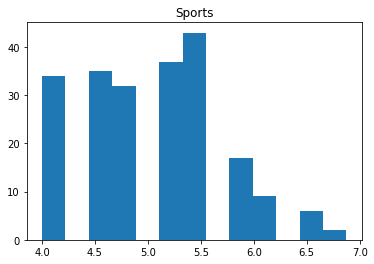

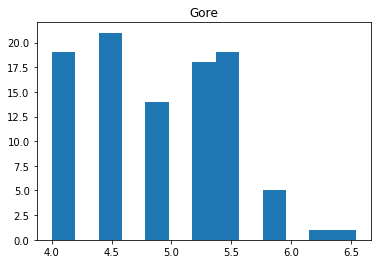

In [100]:
for i in lista_generos:
    plt.hist(jogadores.loc[jogadores.genres.str.contains(i)].compradores, bins = 13)
    plt.title(i)
    plt.show()

# Comparando as variáveis de Tempo de jogo

In [102]:
excel_only_jogos.loc[:,["name","average_playtime","median_playtime"]]

,name,average_playtime,median_playtime
0,Counter-Strike,17612,317
1,Team Fortress Classic,277,62
2,Day of Defeat,187,34
3,Deathmatch Classic,258,184
4,Half-Life: Opposing Force,624,415
5,Ricochet,175,10
6,Half-Life,1300,83
7,Counter-Strike: Condition Zero,427,43
8,Half-Life: Blue Shift,361,205
9,Half-Life 2,691,402


In [121]:
excel_only_jogos.loc[:,["name","average_playtime","median_playtime"]].describe()

,average_playtime,median_playtime
count,6170.000000,6170.000000
mean,657.369368,640.918476
std,3783.666030,4898.936256
min,1.000000,1.000000
25%,77.000000,77.000000
50%,222.000000,228.000000
75%,365.000000,371.000000
max,190625.000000,190625.000000


Percebe-se que as medias entre as duas são bem próximas, mas como a mediana tende a evitar outliers, decidimos continuar trabalhando com as duas medidas

# Plotagem dos diferentes variáveis com o Percent_Positive

### Plot dos scatters do Preço com o Percent_Positive (Feedback)

In [107]:
#multilinear regression

A correlação entre  é de 0.1834043695785418


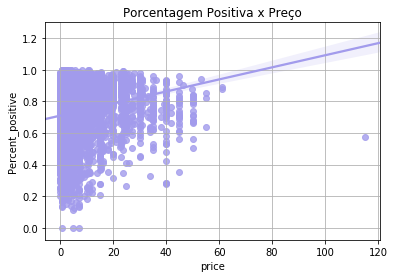

In [125]:
sns.regplot(excel_only_jogos["price"],excel_only_jogos["Percent_positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x Preço")
plt.grid(True)
print('A correlação entre  é de', excel_only_jogos['price'].corr(excel_only_jogos['Percent_positive']))

### Plot dos scatters do número de categorias com o Percent_Positive (Feedback)

A correlação entre  é de 0.1697235960146996


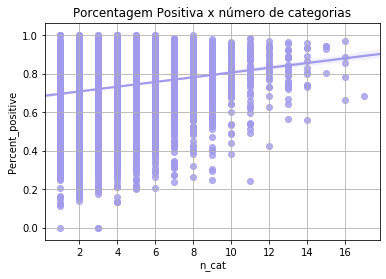

In [140]:
#plt.scatter(excel_only_jogos["n_cat"],excel_only_jogos["Percent_positive"])
sns.regplot(excel_only_jogos["n_cat"],excel_only_jogos["Percent_positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x número de categorias")
plt.grid(True)
print('A correlação entre  é de', excel_only_jogos['n_cat'].corr(excel_only_jogos['Percent_positive']))

### Plot dos scatters da média de horas jogadas com o Percent_Positive (Feedback)

A correlação entre  é de 0.033726173810552144


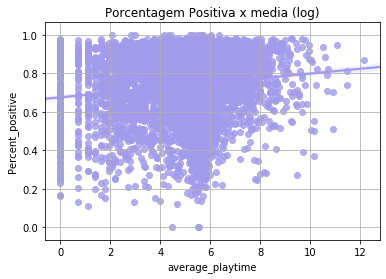

In [141]:
sns.regplot(np.log(excel_only_jogos["average_playtime"]),excel_only_jogos["Percent_positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x media (log)")
plt.grid(True)
print('A correlação entre  é de', excel_only_jogos['average_playtime'].corr(excel_only_jogos['Percent_positive']))
plt.show(True)

### Plot dos scatters da mediana de horas jogadas com o Percent_Positive (Feedback)

A correlação entre  é de 0.019249278164102126


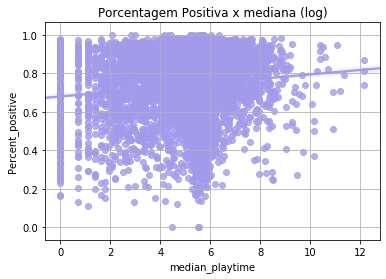

In [138]:
sns.regplot(np.log(excel_only_jogos["median_playtime"]),excel_only_jogos["Percent_positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x mediana (log)")
plt.grid(True)
print('A correlação entre  é de', excel_only_jogos['median_playtime'].corr(excel_only_jogos['Percent_positive']))
plt.show(True)

### Plot dos scatters da Idade de jogo com o Percent_Positive (Feedback)

A correlação entre  é de 0.1213310972377113


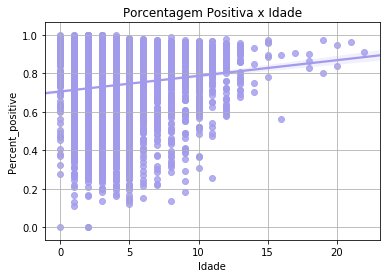

In [139]:
sns.regplot(excel_only_jogos["Idade"],excel_only_jogos["Percent_positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x Idade")
plt.grid(True)
print('A correlação entre  é de', excel_only_jogos['Idade'].corr(excel_only_jogos['Percent_positive']))

## Conclusão
analisando essas variáveis, não foi possivel encontrar nenhuma grande correlação entre as variáveis, sendo a maior de 0.18 (Idade)

# Regressão linear

De acordo com os scatters, percebe-se que as variaveis median_playtime e average_playtime tem as piores correlações. Para isso, eles não serão considerados na regressão linear

In [113]:
excel_only_jogos = excel_only_jogos.dropna()
X_num1 = excel_only_jogos[["price", "n_cat", "Idade"]]
y = excel_only_jogos["Percent_positive"]

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_num1, y, test_size=0.2)

In [115]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [116]:
reg.score(X_test, y_test)

0.06068604038059311

In [117]:
reg.coef_

array([0.00340872, 0.01040707, 0.00992725])

In [118]:
reg.intercept_

0.6294473659753181

# RandomForestRegressor

In [119]:
from sklearn.ensemble import RandomForestRegressor

reg_ff = RandomForestRegressor(n_estimators=100, random_state=42)
reg_ff.fit(X_train, y_train)
reg_ff.score(X_test, y_test)

0.023008590385387717

# Definição de Regressão linear
a regressão linear tem como base,